In [1]:
import numpy as np
import pandas as pd

In [9]:
claims = pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Python Pandas Practise\\claims.csv")
customer = pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Python Pandas Practise\\cust_demographics.csv")

In [10]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1,No


In [11]:
customer.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [ ]:
Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to 
create a 360-degree view of the data. Use the same for the subsequent questions.


In [15]:
df =pd.merge(right =claims ,left =customer,right_on="customer_id",left_on="CUST_ID" , how="outer")
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [18]:
df.drop(columns=['customer_id'],inplace=True)
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [ ]:
Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns 
and their business significance.


In [20]:
df.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [ ]:
DateofBirth,claim_date - object is the datatype ,we can convert them to datetimeobject
Contact,claim_amount   - object datatype, we can convert them respectively to int and float datatypes

In [27]:

df.DateOfBirth =  pd.to_datetime(df.DateOfBirth, format = "%d-%b-%y")
df.claim_date  = pd.to_datetime(df.claim_date,format = "%m/%d/%Y")

In [35]:
df.claim_amount = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')

In [36]:
df.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

In [37]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [ ]:
Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [38]:
from numpy import where as IF
df['Flag'] = IF(df.police_report == "No",0,
               IF(df.police_report == "Yes",1,np.nan))

In [39]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0


In [40]:
df.drop(columns=['police_report'],inplace=True)
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0


In [ ]:
Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [41]:
df.isnull().sum()

CUST_ID                 15
gender                  15
DateOfBirth             15
State                   15
Contact                 15
Segment                 15
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount             7
total_policy_claims      7
fraudulent               7
Flag                   307
dtype: int64

In [44]:
cat_col=['gender','State','Segment','incident_cause','claim_area','claim_type','fraudulent','Flag']
num_col=['claim_amount']

In [45]:
for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])
df[num_col] = df[num_col].fillna(df[num_col].mean())

In [46]:
df.isnull().sum()

CUST_ID                15
gender                  0
DateOfBirth            15
State                   0
Contact                15
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims     7
fraudulent              0
Flag                    0
dtype: int64

In [ ]:
Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

Children < 18

Youth 18-30

Adult 30-60

Senior > 60

In [47]:
df['Age'] = round((df['claim_date'] - df['DateOfBirth']).apply(lambda x: x.days)/365.25, 2)

In [48]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,38.87
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,48.72
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0,33.90
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.06
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0,32.13


In [49]:
df['Age_grp'] = IF(df.Age < 18,'Children',
                   IF(df.Age < 30, 'Youth',
                     IF(df.Age < 60 ,'Adult',
                       IF(df.Age < 100,'Senior','NaN'))))

df['Age_grp'] = df['Age_grp'].fillna(df['Age_grp'].mode())

In [50]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_grp
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,38.87,Adult
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,48.72,Adult
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0,33.90,Adult
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.06,Adult
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0,32.13,Adult


In [ ]:
What is the average amount claimed by the customers from various segments?

In [52]:
df.groupby(by='Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12663.184570
Platinum,12311.715820
Silver,11938.696289


In [ ]:
What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [53]:
df.loc[df.claim_date < "2018-09-10",:].groupby("incident_cause")['claim_amount'].sum().add_prefix("total_")

incident_cause
total_Crime                  677391.0
total_Driver error          3343244.5
total_Natural causes        1295049.5
total_Other causes          3717648.5
total_Other driver error    3430364.0
Name: claim_amount, dtype: float32

In [ ]:
How many adults from TX, DE and AK claimed insurance for driver related issues and causes?


In [54]:
df.loc[(df.incident_cause.str.lower().str.contains('driver') 
        & ((df.State == 'TX')|(df.State == 'DE') |(df.State == 'AK'))),:].groupby('State')['State'].count()

State
AK    11
DE    15
TX    10
Name: State, dtype: int64

In [ ]:
Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [57]:
piec1 = df.groupby(by=['gender','Segment'])['claim_amount'].sum().reset_index()
piec1.head()

,gender,Segment,claim_amount
0,Female,Gold,2113004.500
1,Female,Platinum,2422839.000
2,Female,Silver,1930793.250
3,Male,Gold,2838300.500
4,Male,Platinum,2070937.125


In [59]:
piec2 = piec1.pivot (index ="Segment",columns="gender",values="claim_amount")
piec2

gender,Female,Male
Segment,,
Gold,2113004.50,2838300.500
Platinum,2422839.00,2070937.125
Silver,1930793.25,2259689.000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

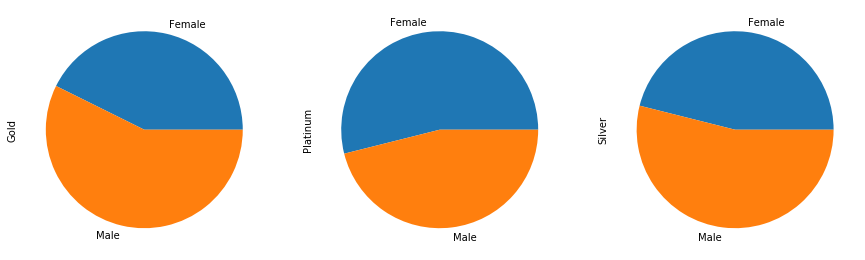

In [62]:
piec2.T.plot(kind ='pie' , subplots =True ,legend = False,figsize=(15,8))
plt.show()

In [ ]:
Among males and females, which gender had claimed the most for any type of driver related issues? E.g. bar chart


In [64]:
bar1 =df.loc[(df.incident_cause.str.lower().str.contains('driver'))].groupby(by='gender')[['gender']].count().add_prefix("Countof_").reset_index()

In [65]:
bar1

,gender,Countof_gender
0,Female,222
1,Male,289


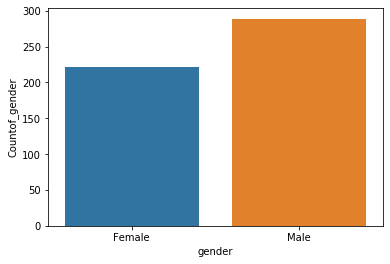

In [66]:
sns.barplot(x='gender',y='Countof_gender',data = bar1)
plt.show()

In [ ]:
Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [74]:
bar2 = df.groupby(by='Age_grp')[['fraudulent']].count()
bar2

,fraudulent
Age_grp,
Adult,505
Children,253
NaN,22
Youth,327


In [ ]:
Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.


In [76]:
df['claim_date']=pd.to_datetime(df.claim_date)
df['claimmonth'] = df['claim_date'].dt.month
m1= df.groupby(by=['CUST_ID','claimmonth'])["claim_amount"].sum().reset_index()
m1

,CUST_ID,claimmonth,claim_amount
0,154557.0,4.0,23241.5
1,263204.0,4.0,39192.0
2,287476.0,10.0,1621.5
3,441097.0,3.0,37040.0
4,524545.0,7.0,35250.0
...,...,...,...
1080,99674324.0,7.0,21480.0
1081,99723844.0,1.0,14360.0
1082,99761663.0,4.0,1242.0
1083,99892000.0,11.0,2415.0


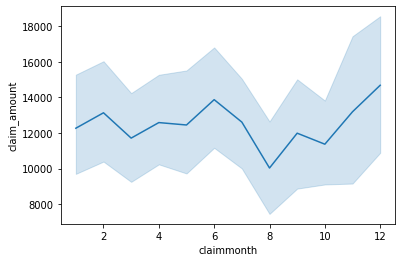

In [77]:
sns.lineplot(x='claimmonth',y='claim_amount',data=m1)

In [ ]:
What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [89]:
bar3 = df.groupby(by=['gender','Age_grp'])["claim_amount"].mean().reset_index()
bar3

,gender,Age_grp,claim_amount
0,Female,Adult,13596.286133
1,Female,Children,10491.612305
2,Female,NaN,12317.584961
3,Female,Youth,11176.272461
4,Male,Adult,12995.242188
5,Male,Children,13161.746094
6,Male,NaN,10894.098633
7,Male,Youth,11372.154297
